In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-dataset/brain_stroke.csv


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-stroke-dataset/brain_stroke.csv


# Starting with some data inspection

Importation and first visualization

In [3]:
data=pd.read_csv('/kaggle/input/brain-stroke-dataset/brain_stroke.csv')
data.tail(20) # / or .head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4961,Male,59.00,1,0,Yes,Govt_job,Rural,253.93,32.1,formerly smoked,0
4962,Male,3.00,0,0,No,children,Rural,194.75,20.1,Unknown,0
4963,Female,20.00,0,0,No,Govt_job,Rural,79.53,26.5,never smoked,0
4964,Female,78.00,0,0,Yes,Govt_job,Urban,101.76,27.3,smokes,0
4965,Male,52.00,1,0,Yes,Govt_job,Rural,116.62,31.7,smokes,0
4966,Female,65.00,0,1,Yes,Private,Rural,57.52,29.4,formerly smoked,0
4967,Male,59.00,0,0,Yes,Private,Urban,223.16,33.2,Unknown,0
4968,Female,78.00,1,1,Yes,Private,Rural,206.53,31.2,never smoked,0
4969,Female,70.00,0,1,Yes,Self-employed,Rural,65.68,28.6,Unknown,0
4970,Female,70.00,0,1,Yes,Self-employed,Urban,240.69,30.9,smokes,0


In [4]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


**** First, let's check whether there is any NaN

In [6]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

None ! Great, nothing to do here.

So, we have 11 columns in total, 10 correspond to the (explanatory?) variables and one column represents our target.
Let's look at some distributions : 

In [7]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

In [8]:
data.groupby(['ever_married','stroke'])['stroke'].count()

ever_married  stroke
No            0         1672
              1           29
Yes           0         3061
              1          219
Name: stroke, dtype: int64

# A little bit of Data Viz

<Figure size 800x600 with 0 Axes>

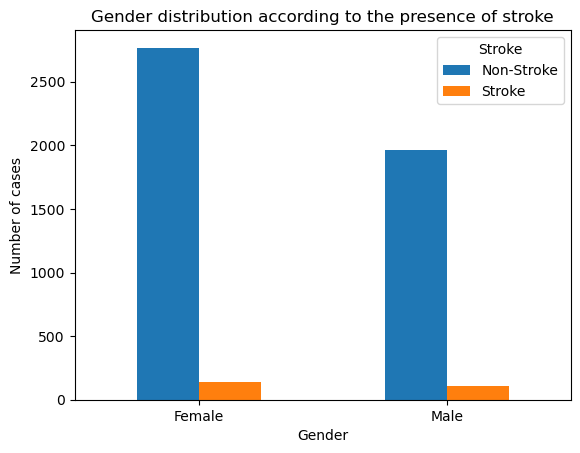

In [9]:
import matplotlib.pyplot as plt


# First diagram to see gender distribution
plt.figure(figsize=(8, 6))
gender_stroke = data.groupby(['gender', 'stroke']).size().unstack()
gender_stroke.plot(kind='bar')
plt.title('Gender distribution according to the presence of stroke')
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()


Firstly, our dataset contains more women than men.

Let's take a quick look at possible correlations: 

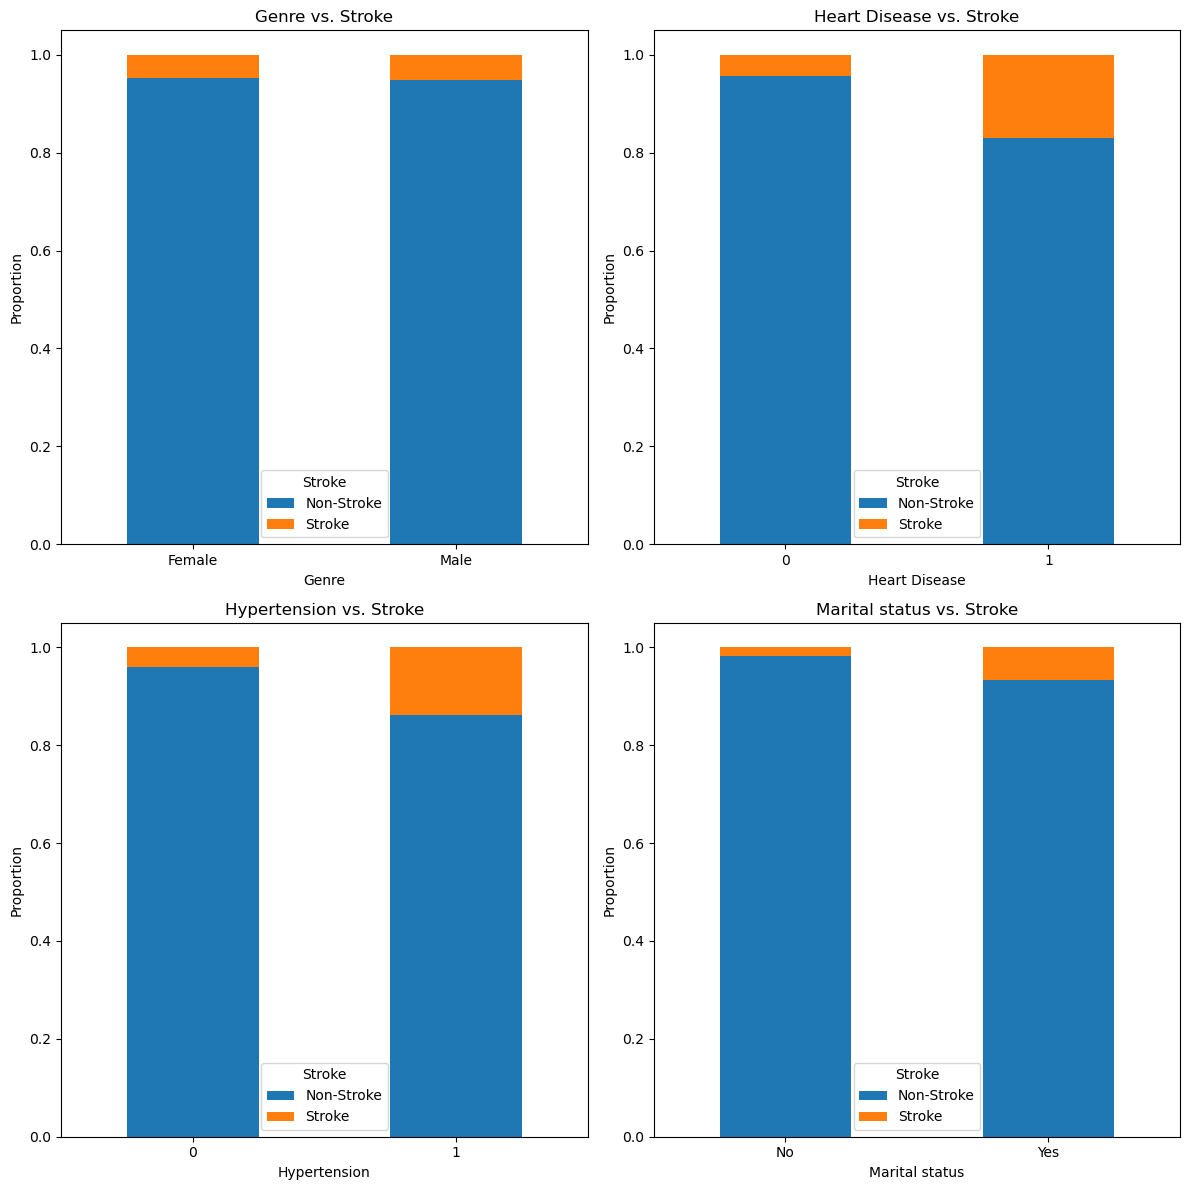

In [10]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Calculate the proportions of strokes by gender
gender_stroke = data.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_props = gender_stroke.div(gender_stroke.sum(axis=1), axis=0)
gender_stroke_props.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Genre vs. Stroke')
axes[0, 0].set_xlabel('Genre')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Calculate the proportions for the presence of stroke as a function of heart disease
heart_disease_stroke = data.groupby(['heart_disease', 'stroke']).size().unstack()
heart_disease_stroke_props = heart_disease_stroke.div(heart_disease_stroke.sum(axis=1), axis=0)
heart_disease_stroke_props.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease vs. Stroke')
axes[0, 1].set_xlabel('Heart Disease')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Calculate the proportions for the presence of stroke as a function of hypertension
hypertension_stroke = data.groupby(['hypertension', 'stroke']).size().unstack()
hypertension_stroke_props = hypertension_stroke.div(hypertension_stroke.sum(axis=1), axis=0)
hypertension_stroke_props.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Hypertension vs. Stroke')
axes[1, 0].set_xlabel('Hypertension')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Calculate the proportions for the presence of stroke according to marital status (Why not ?)
ever_married_stroke = data.groupby(['ever_married', 'stroke']).size().unstack()
ever_married_stroke_props = ever_married_stroke.div(ever_married_stroke.sum(axis=1), axis=0)
ever_married_stroke_props.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Marital status vs. Stroke')
axes[1, 1].set_xlabel('Marital status')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


These results would suggest that being married increases the risk of having a stroke...There must be another explanation!

<Figure size 800x600 with 0 Axes>

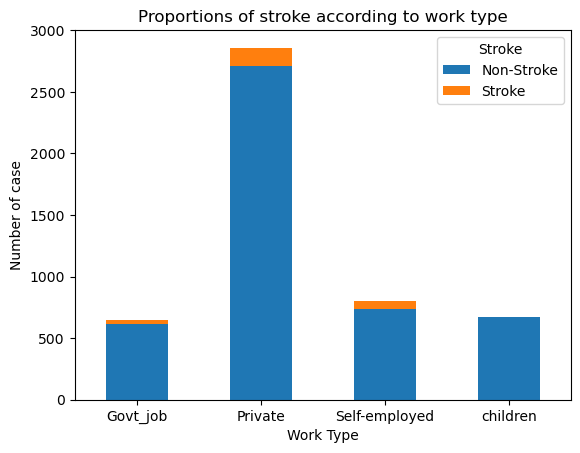

In [11]:

plt.figure(figsize=(8, 6))
work_type = data.groupby(['work_type', 'stroke']).size().unstack()
work_type_stroke_props = work_type.div(work_type.sum(axis=1), axis=0)
work_type.plot(kind='bar', stacked= True)


plt.title('Proportions of stroke according to work type')
plt.xlabel('Work Type')
plt.ylabel('Number of case')
plt.legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()

Here we see that the children will note be really interesting for our model.

Other way to visualize distribution and proportion: 

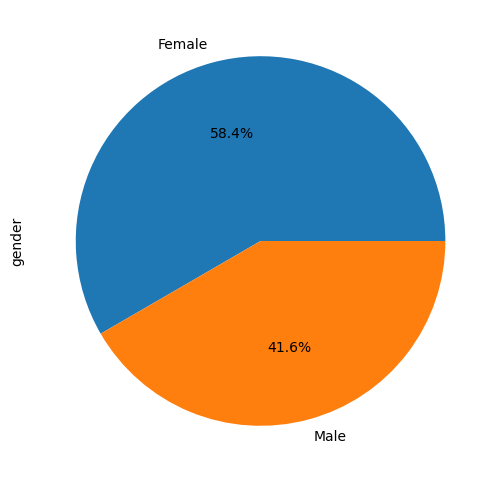

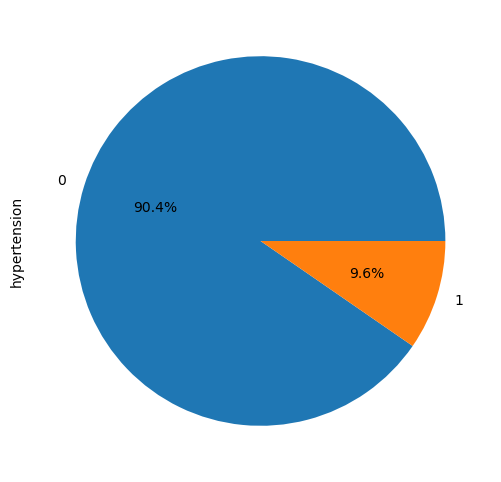

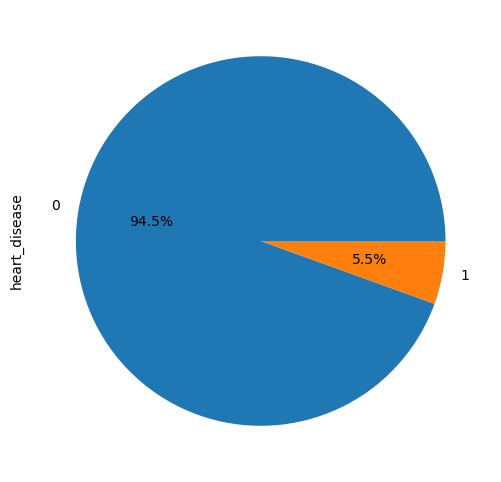

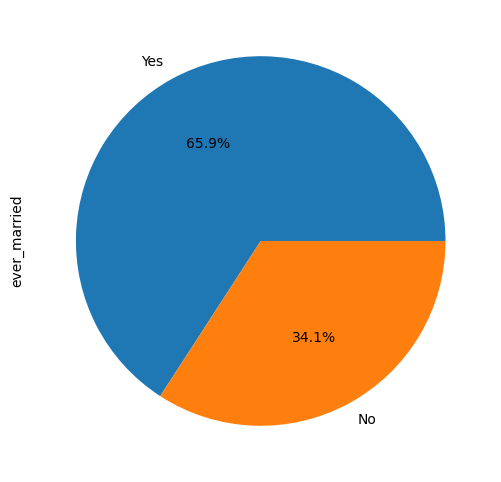

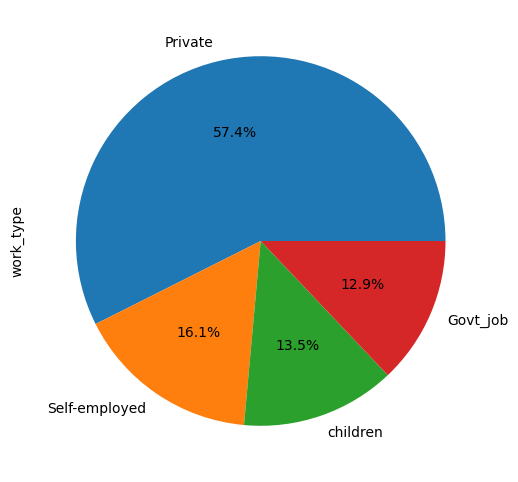

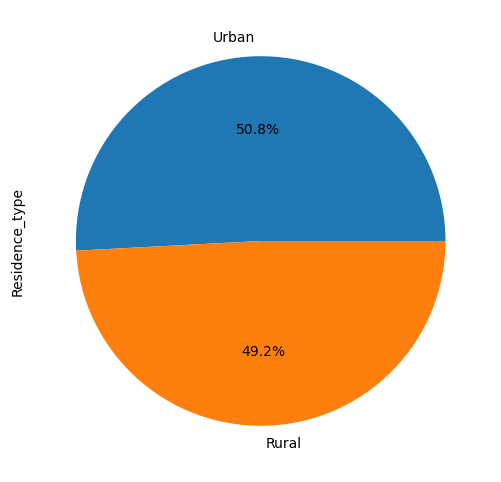

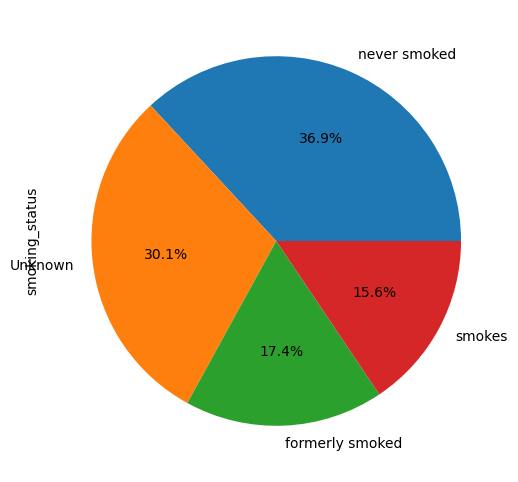

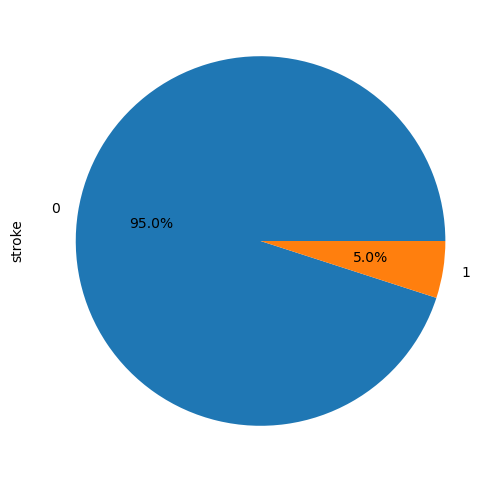

In [12]:
data_categorical = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

for i in data_categorical.columns:
    plt.figure(figsize = (15,6))
    data_categorical[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

In [13]:
data_numerical = data[['age', 'avg_glucose_level', 'bmi']]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/1075897730.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_numerical[i], palette = 'hls')


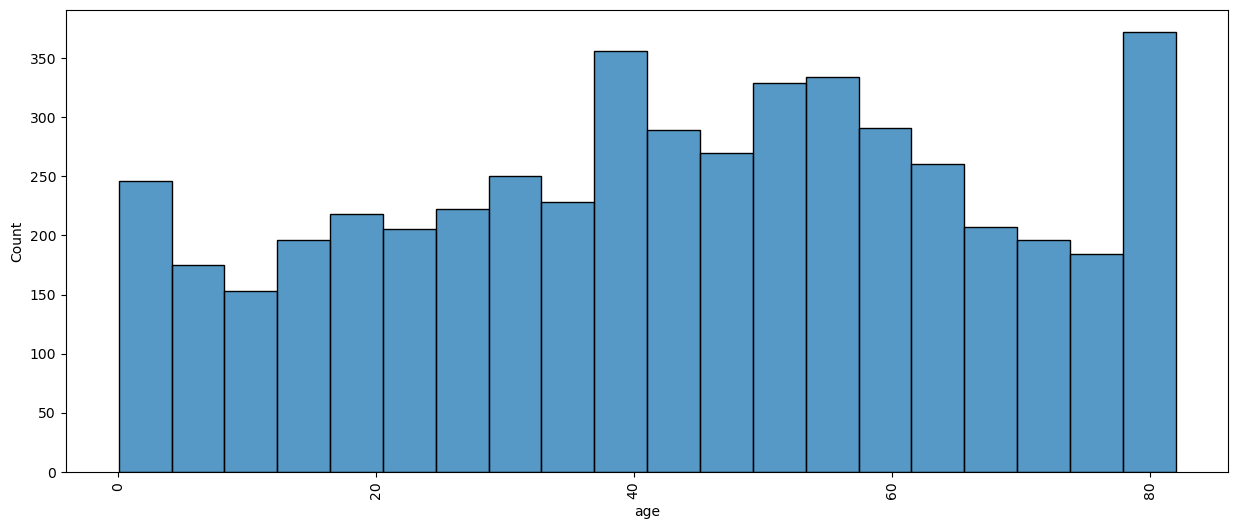

/tmp/ipykernel_20/1075897730.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_numerical[i], palette = 'hls')


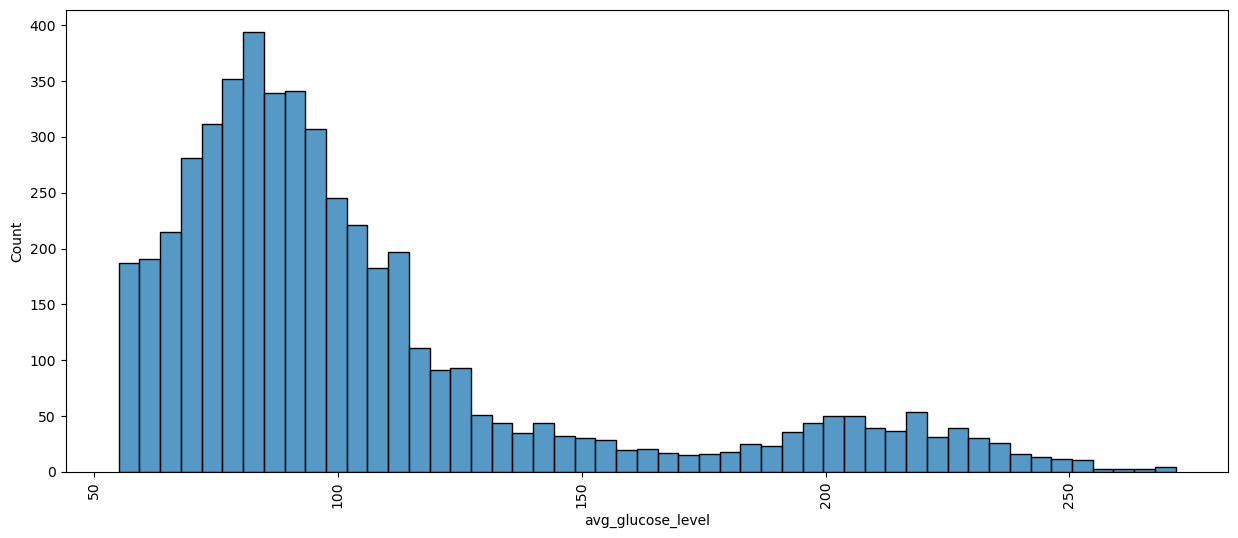

/tmp/ipykernel_20/1075897730.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data_numerical[i], palette = 'hls')


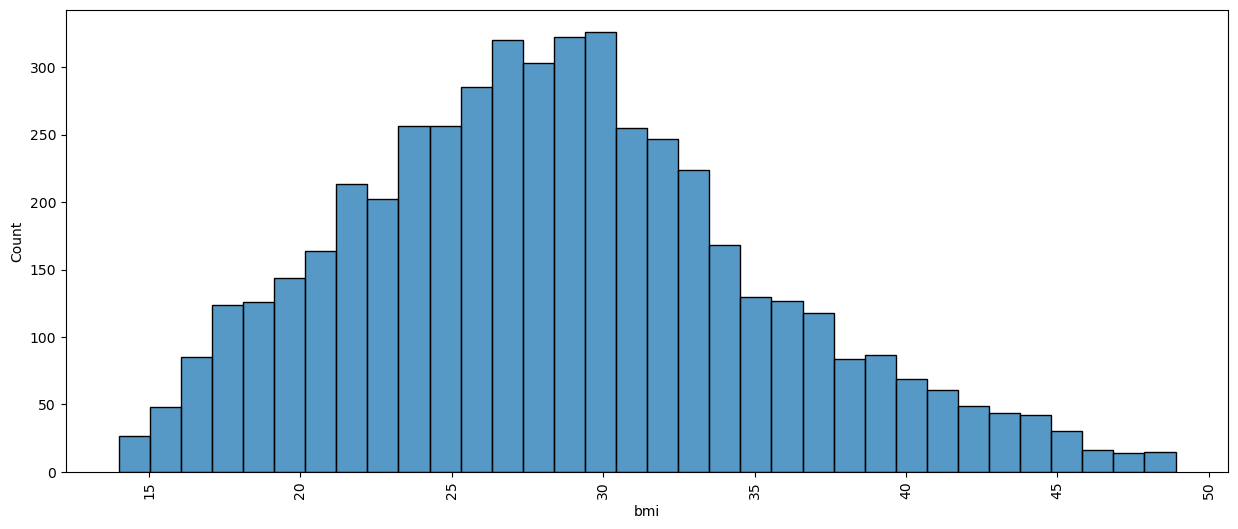

In [14]:
import seaborn as sns

for i in data_numerical.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data_numerical[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

We can also look at some rough correlations

/tmp/ipykernel_20/3662486909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


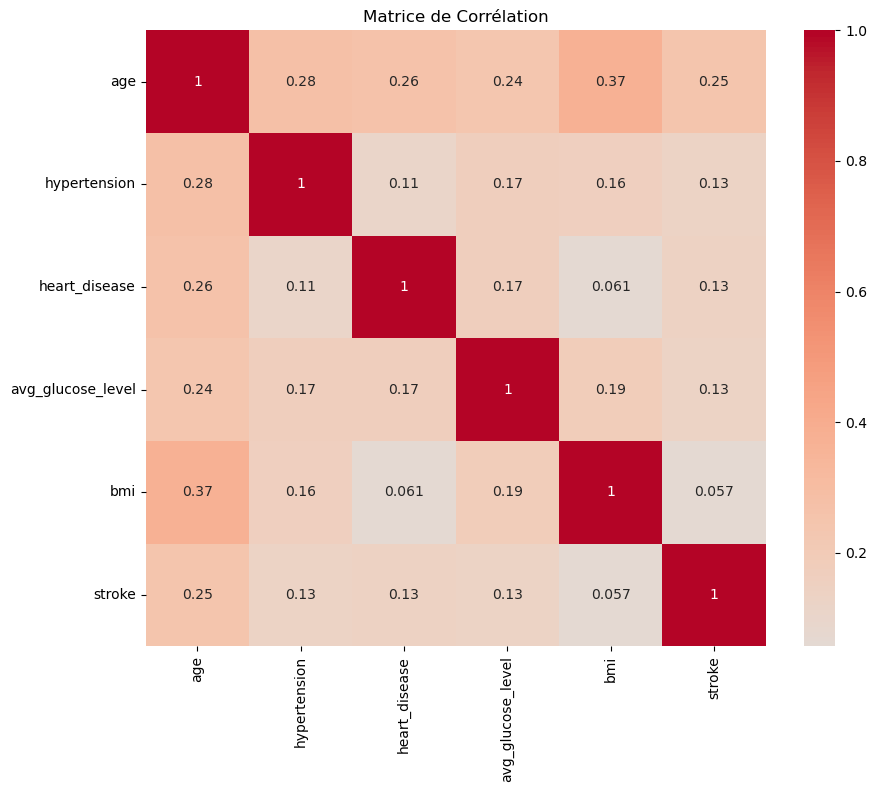

In [15]:
correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

Our target variable 'stroke' seems to have its highest correlation with the age 'column'

# Data preparation

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


We are going to transform certain data into numerical categories

In [17]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [18]:
# Utilisation de get_dummies pour les variables catégoriques
data=pd.get_dummies(data,columns=['smoking_status'])


And remove variables that seem irrelevant

In [19]:
data=data.drop(['work_type'],axis=1)
data=data.drop(['Residence_type'],axis=1)

In [20]:
data.head() #Verification of applied changes

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,1,0,1,0,0
1,0,80.0,0,1,1,105.92,32.5,1,0,0,1,0
2,1,49.0,0,0,1,171.23,34.4,1,0,0,0,1
3,1,79.0,1,0,1,174.12,24.0,1,0,0,1,0
4,0,81.0,0,0,1,186.21,29.0,1,0,1,0,0


# Separating our dataset into train set and test set

In [21]:
from sklearn.model_selection import train_test_split


X=data.drop(['stroke'],axis=1)
y=data['stroke']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, random_state=3)


Decision trees are usually good candidates for this type of classification problem.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

Let's take a look at the result :

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.95


Seems pretty good ! Now the confusion matrix...

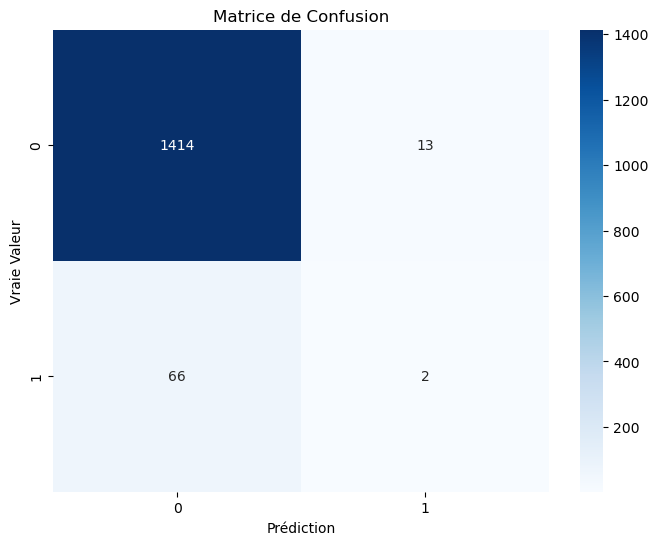

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# The matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()


Ok... Is-it really good ?

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude : {accuracy:.2f}")

# Calculer la précision
precision = precision_score(y_test, y_pred)
print(f"Précision : {precision:.2f}")

# Calculer le rappel
recall = recall_score(y_test, y_pred)
print(f"Rappel : {recall:.2f}")

# Calculer le score F1
f1 = f1_score(y_test, y_pred)
print(f"Score F1 : {f1:.2f}")


Exactitude : 0.95
Précision : 0.13
Rappel : 0.03
Score F1 : 0.05


 We can see that the accuracy is very good, **which might lead us to believe that the model is performing well**, but if we look at the other metrics, we see that our model is in fact, not so good: it classifies almost all the observations in the 'Non-stroke' section.

Why is this? Probably because we haven't taken into account in our model the large imbalance between our classes: as mentioned before in the dataset, we have many more people labelled 'Non-stroke' than 'Stroke'.

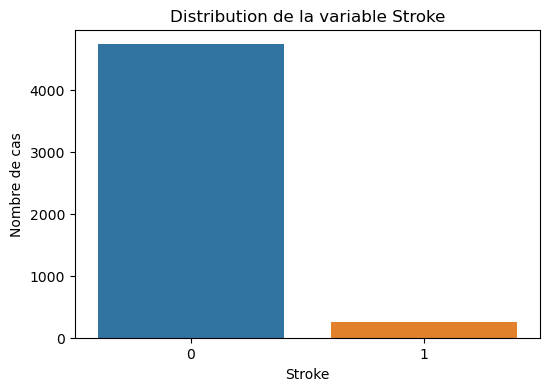

0    4733
1     248
Name: stroke, dtype: int64


In [26]:
stroke_counts = data['stroke'].value_counts()

# Créer un diagramme en barres pour visualiser la distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='stroke')
plt.title('Distribution de la variable Stroke')
plt.xlabel('Stroke')
plt.ylabel('Nombre de cas')
plt.show()

# Afficher le compte détaillé
print(stroke_counts)

# Let's try using techniques to reduce the unbalancing of our data, in particular by giving different weights to our labels.

**Data separation and stratification**

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3, stratify = y, random_state=3)

Just a little change : "stratify = y".
With this,we apply a "statification" in our data. Stratification involves dividing your data into a training set and a test set in such a way that **the distribution of classes is maintained in both sets**.

Let's see what it will change :

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude : {accuracy:.2f}")

# Calculer la précision
precision = precision_score(y_test, y_pred)
print(f"Précision : {precision:.2f}")

# Calculer le rappel
recall = recall_score(y_test, y_pred)
print(f"Rappel : {recall:.2f}")

# Calculer le score F1
f1 = f1_score(y_test, y_pred)
print(f"Score F1 : {f1:.2f}")


Exactitude : 0.95
Précision : 0.00
Rappel : 0.00
Score F1 : 0.00


Humpf... That's disapointing.
We will have to try something else.

**Class ponderation**

This method involves assigning different weights to classes according to their frequency.

In [29]:
# Class ponderation : 

class_weights = {0: 1, 1: 25}  # Adjust the weights according to the imbalance in our data
dt_clf_weighted = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5, class_weight=class_weights)

# Entraîner le modèle
dt_clf_weighted.fit(X_train, y_train)

# Faire des prédictions
y_pred_weighted = dt_clf_weighted.predict(X_test)

# Calculer l'exactitude
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)
print(f"Accuracy with class ponderation : {accuracy_weighted:.2f}")

Accuracy with class ponderation : 0.67


Our score is far less flattering, but let's see what we have for our other metrics :

In [30]:
print(f"Recall with class ponderation : {recall_weighted:.2f}")
print(f"F1 with class ponderation : {f1_weighted:.2f}")

Recall with class ponderation : 0.80
F1 with class ponderation : 0.20


A way more acceptable score for the recall !

And the confusion matrix : 

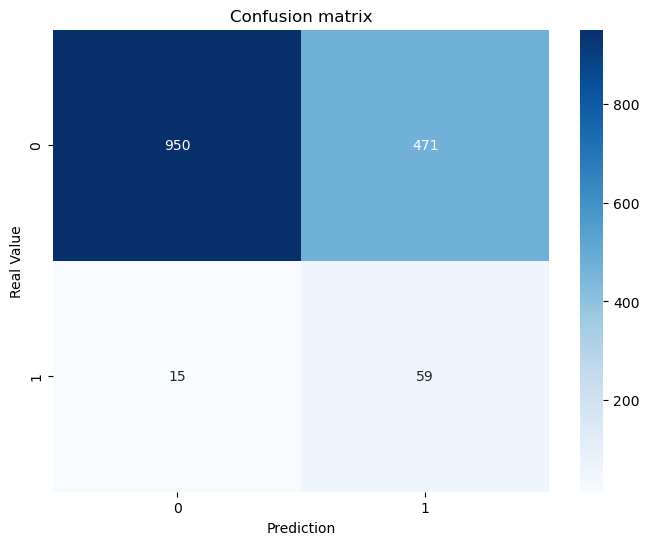

In [31]:
confusion_mat2 = confusion_matrix(y_test, y_pred_weighted)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.show()

At least we now have a more interesting basis for improving our model.

**Work on hyperparameters**

In [32]:

class_weights = {0: 1, 1: 25}  # Ajuster les poids en fonction du déséquilibre
dt_clf_weighted = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=20, class_weight=class_weights)

# Entraîner le modèle
dt_clf_weighted.fit(X_train, y_train)

# Faire des prédictions
y_pred_weighted = dt_clf_weighted.predict(X_test)

# Calculer l'exactitude
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Exactitude avec pondération des classes : {accuracy_weighted:.2f}")
print(f"Recall with class ponderation : {recall_weighted:.2f}")

Exactitude avec pondération des classes : 0.91
Recall with class ponderation : 0.80


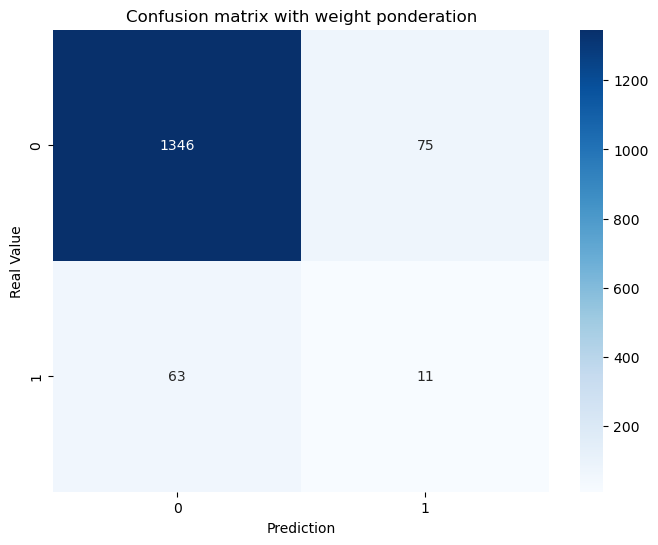

In [33]:
confusion_mat3 = confusion_matrix(y_test, y_pred_weighted)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix with weight ponderation')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.show()

With just a change in the depth of our model, we were able to incerease significantly our accuracy while retaining our good recall score.

**But ultimately, which model would you choose?**

# What to conclude ?

This notebook shows us how to work on a classification problem in the medical field.
We were able to see that it was fairly easy to find a model that performed very well in terms of accuracy (with a tendency for the model to classify all samples in class 0, i.e. Non-Stroke). But if there's one thing to take away from this Notebook, it's that it's important to ask ourselves what we want our model to achieve.

In the context of a predictive model in the medical field, accuracy may not be our most interesting metric: our main aim would be to ensure that everyone at risk of developing a stroke is detected, even if this means generating more false positives.

Are our models perfect? Obviously not, and there are certainly other things that could be done to improve this model still further. But the main point here was to highlight the importance of looking at all, or at least more than one metric, and of clearly understanding what capability we are looking for in our classification model.

**NB : That's all ! 
That was my first Notebook and contribution to Kaggle, I hope you appreciated this work. It was really interesting for me to try to be as educational as possible. I hope to be able to keep the motivation to create other notebooks and contributions on Kaggle.

Have fun !**